# <strong>Classifcation Model<strong> - KNN - Linear Regression 

Practica donde se aplica el modelo KNN de la libreria sklearn para clasificar los datos de un dataset de diabetes.
Usando GridSearchCV para encontrar los mejores parametros para el modelo, cross_val_score para evaluar el modelo y confusion_matrix para ver la matriz de confusion.

## KNN Vecinos Cercanos

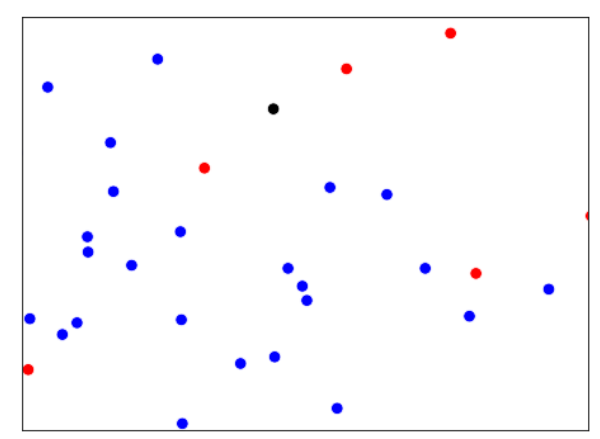

### Importamos paquetes

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## Ejemplo KNN con Diabtes

In [25]:
data_diabetes = pd.read_csv('diabetes_clean.csv')
data_diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
# Dividimos dataset en train 80% y test 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_diabetes.drop('diabetes', axis=1), data_diabetes['diabetes'], 
                                                    test_size=0.2, random_state=42, stratify=data_diabetes['diabetes'])

print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [28]:
# Entrenamos modelo KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6)# El neighbor es el numero de vecinos que se van a tomar en cuenta
model_knn.fit(x_train, y_train)


print('Accuracy: ', model_knn.score(x_test, y_test))


Accuracy:  0.7142857142857143


In [29]:
columns = data_diabetes.columns.drop('diabetes')
values = data_diabetes[columns].loc[20].values.reshape(1, -1)
diabetes = data_diabetes['diabetes'].loc[20]

data_invent = pd.DataFrame(columns=columns, data=values)

data_invent['diabetes_pred'] = model_knn.predict(data_invent)
data_invent['diabetes'] = diabetes

data_invent

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes_pred,diabetes
0,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27.0,0,0


In [30]:
# CROSS VALIDATION 
from sklearn.model_selection import cross_val_score

model_knn = KNeighborsClassifier(n_neighbors=10)

cv_scores = cross_val_score(model_knn, data_diabetes.drop('diabetes', axis=1), data_diabetes['diabetes'], cv=10)

print(np.mean(cv_scores))

0.7434723171565277


In [31]:
from sklearn.model_selection import GridSearchCV

knn_opt = KNeighborsClassifier()

param = {'n_neighbors': np.arange(1, 15)}

knn_gscv = GridSearchCV(knn_opt, param, cv=10)

knn_gscv.fit(data_diabetes.drop('diabetes', axis=1), data_diabetes['diabetes'])


print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'n_neighbors': 14}
0.7539131920710869


### Ejercicio

En este ejercicio, construiremos un modelo de clasificación utilizando el conjunto de datos telecom_churn.

Utilizando el método KNN queremos clasificar si una cliente se va a dara de bajar a partir de su  'account_length' y de su 'customer_service_calls'.

Obtén las predicciones de tu modelo.


In [32]:
data_telechurn = pd.read_csv('telecom_churn_clean.csv')

data_telechurn.pop('Unnamed: 0')

data_telechurn.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [33]:
x = data_telechurn[['account_length','customer_service_calls']]
y = data_telechurn['churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

modelo = KNeighborsClassifier(n_neighbors=6)

modelo.fit(x_train, y_train)

print('Accuracy: ', modelo.score(x_test, y_test))

Accuracy:  0.856071964017991


Mediante Cross validation, indica la accuracy de tu modelo. Prueba para n_neighbors de 4 a 11. Muestra las acuracys en un gràfico

In [34]:
for i in range(4, 11):
    modelo = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(modelo, x, y, cv=10)

    print(np.mean(cv_scores))

    cv_scores = list(cv_scores)

0.8562892233550915
0.8559871248494003
0.8574886263509018
0.858686231141321
0.8568898239556922
0.8559898221574869
0.857788926651202


Mediante GridSearchCV obtén el n_neighbors óptimo e indica su accuracy. Vuelve a generar el modelo y predice si un cliente con: account_length = 103 y customer_service_calls = 25 se darà de baja.

In [35]:
knn_opt = KNeighborsClassifier()

param = {'n_neighbors': np.arange(1, 15)}

knn_gscv = GridSearchCV(knn_opt, param, cv=10)

knn_gscv.fit(x, y)

print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'n_neighbors': 7}
0.858686231141321


In [36]:
data_pred = pd.DataFrame(columns=x.columns, data=[[103, 25]])

data_pred['churn_pred'] = knn_gscv.predict(data_pred)
data_pred

,account_length,customer_service_calls,churn_pred
0,103,25,1


## Linear regression SickitLearn

A partir del dataset sales df, entrena tu modelo para predecir las ventas a partir de la inversión en los diferentes medios.

PD: Deberás hacer split en train/test.

Indica la accuracy de tu modelo

In [37]:
data_sales = pd.read_csv('advertising_and_sales_clean.csv')
data_sales.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [38]:
data_sales.corr()

C:\Users\1vict\AppData\Local\Temp\ipykernel_4228\2386227604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_sales.corr()


,tv,radio,social_media,sales
tv,1.000000,0.869158,0.527687,0.999497
radio,0.869158,1.000000,0.606338,0.868638
social_media,0.527687,0.606338,1.000000,0.527446
sales,0.999497,0.868638,0.527446,1.000000


In [39]:
data_sales['influencer'].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [40]:
# Dividimos dataset en train 80% y test 20%
x_train, x_test, y_train, y_test = train_test_split(data_sales.drop(['sales','influencer'], axis=1), data_sales['sales'],
                                                    test_size=0.2, random_state=42)     

print(x_train.shape[0])
print(x_test.shape[0])

3636
910


Text(0.5, 1.0, 'Social Media vs Sales')

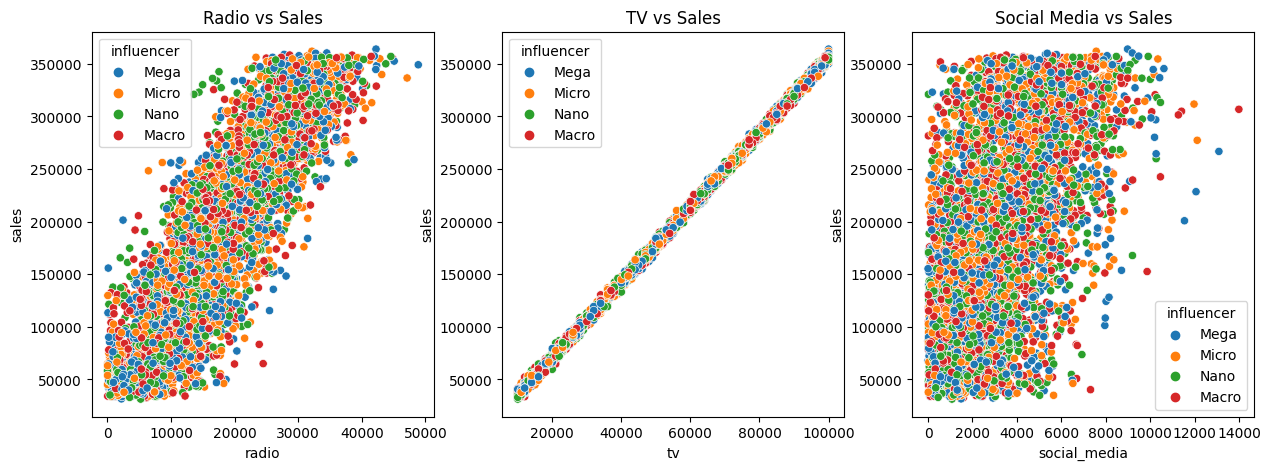

In [41]:
# Ahora todos los graficos anteriores en una sola figura

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0] = sns.scatterplot(x='radio', y='sales', data=data_sales, ax=ax[0], hue='influencer')
ax[0].set_title('Radio vs Sales')

ax[1] = sns.scatterplot(x='tv', y='sales', data=data_sales, ax=ax[1], hue='influencer')
ax[1].set_title('TV vs Sales')

ax[2] = sns.scatterplot(x='social_media', y='sales', data=data_sales, ax=ax[2], hue='influencer')
ax[2].set_title('Social Media vs Sales')

In [42]:
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()

mdl.fit(x_train, y_train)

print('Accuracy: ', mdl.score(x_test, y_test))

Accuracy:  0.9990105552987837


Mediante cross validation obtén el valor de tu modelo.
Al ser una regressión el método cross_val_score te da el Rsquared.

In [43]:
cross_val_score = cross_val_score(mdl, data_sales.drop(['sales','influencer'], axis=1), data_sales['sales'], cv=10)
print('Media de R-squared: ',np.ndarray.mean(cross_val_score))

0.9989906156968562